<a href="https://colab.research.google.com/github/Vik-Gt-321/Aerospace-Codes/blob/main/Glide%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from math import pi
from numpy import arange
import matplotlib.pyplot as plt
import math

In [ ]:
import numpy as np
import random

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
b = 10.47
AR = 8.8
c = 1.211
S = 12.47
m = 750
Ixx = 873
Iyy = 907
Izz = 1680
Ixz = 1144
T = 1136

In [ ]:
H = 3000
v = 50

In [ ]:
Cd0 = 0.036
Cda = 0.041
e = 0.8
Clm = 1.5
Cl0 = 0.365
Cla = 4.2

In [ ]:
k = 1/(pi*e*AR)
k

0.04521447246928845

In [ ]:
def coeff_drag(Cl):
  return Cd0 + k*Cl*Cl

In [ ]:
def coeff_lift(a):
  return Cl0 + a*Cla

In [ ]:
def E(Cl):
  return Cl/coeff_drag(Cl)

In [ ]:
cl = np.linspace(0, 1.55, 50)

In [ ]:
def density(h):
  return 1.225*math.exp(-h/9296)

In [ ]:
1/(2*math.sqrt(k*Cd0))

12.393101878686425

# Minimum Glide Angle

In [ ]:
from scipy.integrate import odeint
import numpy as np

In [ ]:
def deg2rad(deg):
  return deg*math.pi/180

In [ ]:
def rad2deg(rad):
  return 180*rad/math.pi

In [ ]:
Cl_star = np.sqrt(0.036/k)
#np.sqrt(Cd0/k)
E_max = Cl_star/(2*0.036)
gamma0= -3 #math.atan(-1/E_max)
gamma0 = deg2rad(gamma0)

In [ ]:
math.sqrt(3)*Cl_star

1.5455147124428779

In [ ]:
#initial conditions
CL = Cl_star
v0 = 50
h0 = 3000
alpha = (- Cl0 + CL)/ Cla
print(rad2deg(alpha))
print(Cl_star)

7.193394198542996
0.8923033352654226


In [ ]:
def fun(y, t):

  gamma, v, h, x= y
  # print(rad2deg(gamma))
  T = 0
  g = 9.8
  W = m*g

  h = np.float128(h)
  rho = 1.225*np.exp(-h/9296)
  # print(rho)



  CD = coeff_drag(CL)
  # CL = coeff_lift(alpha)
  q = 0.5*rho*v*v*S
  D = (q*CD)
  L = (q*CL)

  v_dash = ( T*np.cos(alpha) - D - W*np.sin(gamma) )/m

  gamma_dash = ( T*np.sin(alpha) + L - W*np.cos(gamma)) / (m*v)

  x_dash = v*np.cos(gamma)

  h_dash = v*np.sin(gamma)

  return [gamma_dash, v_dash, h_dash, x_dash]

In [ ]:
initial = [gamma0, 50, 3000, 0]

In [ ]:
fun(initial, 0)

[0.13330090700663519738,
 -0.81458923527797907807,
 -2.6167978121471913,
 49.931476737728694]

In [ ]:
t = np.linspace(0, 1300, 6000)

In [ ]:
t1t2 = odeint(fun, initial, t)

In [ ]:
t1t2

array([[-5.23598776e-02,  5.00000000e+01,  3.00000000e+03,
         0.00000000e+00],
       [-2.37208645e-02,  4.97941239e+01,  2.99958910e+03,
         1.08057082e+01],
       [ 4.35526956e-03,  4.95307105e+01,  2.99948531e+03,
         2.15678606e+01],
       ...,
       [-8.00739264e-02,  3.17686394e+01, -5.86729345e+02,
         4.52768233e+04],
       [-8.00739524e-02,  3.17676985e+01, -5.87280006e+02,
         4.52836855e+04],
       [-8.00739784e-02,  3.17667576e+01, -5.87830650e+02,
         4.52905475e+04]])

In [ ]:
# gamma = t1t2[0][:, 0]
# v = t1t2[0][:, 1]
# h = t1t2[0][:, 2]
# x = t1t2[0][:, 3]
gamma_maxr = t1t2[:, 0]
v_maxr = t1t2[:, 1]
h_maxr = t1t2[:, 2]
x_maxr = t1t2[:, 3]

In [ ]:
gamma_deg = rad2deg(gamma_maxr)

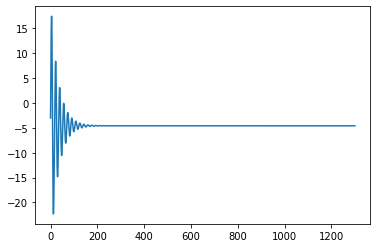

In [ ]:
plt.plot(t, gamma_deg)

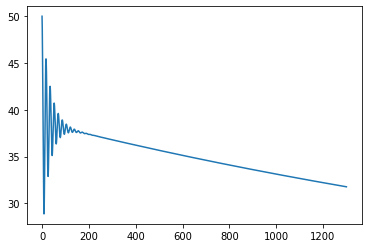

In [ ]:
plt.plot(t, v_maxr)

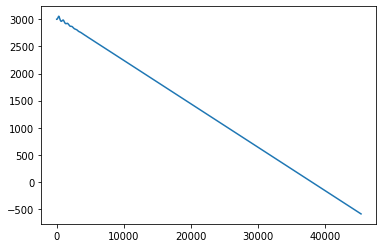

In [ ]:
plt.plot(x_maxr, h_maxr)

# Max Endurance/ Min Descent rate

In [ ]:
Cl_star = np.sqrt(0.036/k)
#np.sqrt(Cd0/k)
E_max = Cl_star/(2*0.036)
gamma0= -3 #math.atan(-1/E_max)
gamma0 = deg2rad(gamma0)

In [ ]:
#initial conditions
CL = math.sqrt(3)*Cl_star
v0 = 50
h0 = 3000
alpha = (- Cl0 + CL)/ Cla
print(rad2deg(alpha))
print(CL)
CL = 1.4

16.104407303827834
1.5455147124428779


In [ ]:
def fun(y, t):

  gamma, v, h, x= y
  # print(rad2deg(gamma))
  T = 0
  g = 9.8
  W = m*g

  h = np.float128(h)
  rho = 1.225*np.exp(-h/9296)
  # print(rho)



  CD = coeff_drag(CL)
  # CL = coeff_lift(alpha)
  q = 0.5*rho*v*v*S
  D = (q*CD)
  L = (q*CL)

  v_dash = ( T*np.cos(alpha) - D - W*np.sin(gamma) )/m

  gamma_dash = ( T*np.sin(alpha) + L - W*np.cos(gamma)) / (m*v)

  x_dash = v*np.cos(gamma)

  h_dash = v*np.sin(gamma)

  return [gamma_dash, v_dash, h_dash, x_dash]

In [ ]:
initial = [gamma0, 50, 3000, 0]

In [ ]:
t = np.linspace(0, 1300, 6000)

In [ ]:
t1t2 = odeint(fun, initial, t)

In [ ]:
gamma_maxe = t1t2[:, 0]
v_maxe = t1t2[:, 1]
h_maxe = t1t2[:, 2]
x_maxe = t1t2[:, 3]

In [ ]:
gamma_deg_maxe = rad2deg(gamma_maxe)

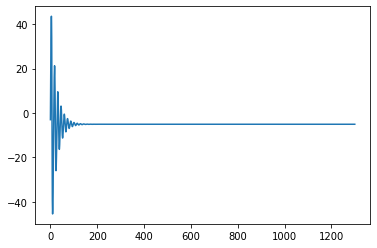

In [ ]:
plt.plot(t, gamma_deg_maxe)

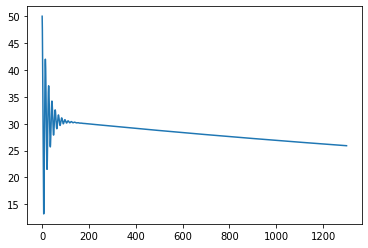

In [ ]:
plt.plot(t, v_maxe)

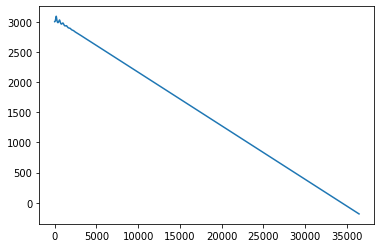

In [ ]:
plt.plot(x_maxe,h_maxe)

# Max cl

In [ ]:
Cl_star = np.sqrt(0.036/k)
#np.sqrt(Cd0/k)
E_max = Cl_star/(2*0.036)
gamma0= -3 #math.atan(-1/E_max)
gamma0 = deg2rad(gamma0)

In [ ]:
print(Cl_star, math.sqrt(3)*Cl_star, k)

0.8923033352654226 1.5455147124428779 0.04521447246928845


In [ ]:
1/(pi*0.9*10.47*10.47/12.43)

0.04010378683124718

In [ ]:
#initial conditions
CL = 1.5
v0 = 50
h0 = 3000
alpha = (- Cl0 + CL)/ Cla
print(rad2deg(alpha))
print(CL)

15.483502320797246
1.5


In [ ]:
def fun(y, t):

  gamma, v, h, x= y
  # print(rad2deg(gamma))
  T = 0
  g = 9.8
  W = m*g

  h = np.float128(h)
  rho = 1.225*np.exp(-h/9296)
  # print(rho)



  CD = coeff_drag(CL)
  # CL = coeff_lift(alpha)
  q = 0.5*rho*v*v*S
  D = (q*CD)
  L = (q*CL)

  v_dash = ( T*np.cos(alpha) - D - W*np.sin(gamma) )/m

  gamma_dash = ( T*np.sin(alpha) + L - W*np.cos(gamma)) / (m*v)

  x_dash = v*np.cos(gamma)

  h_dash = v*np.sin(gamma)

  return [gamma_dash, v_dash, h_dash, x_dash]

In [ ]:
initial = [gamma0, 50, 3000, 0]

In [ ]:
t = np.linspace(0, 1300, 6000)

In [ ]:
t1t2 = odeint(fun, initial, t)

In [ ]:
gamma_maxcl = t1t2[:, 0]
v_maxcl = t1t2[:, 1]
h_maxcl = t1t2[:, 2]
x_maxcl = t1t2[:, 3]

In [ ]:
gamma_deg_maxcl = rad2deg(gamma_maxcl)

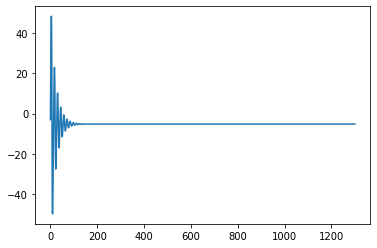

In [ ]:
plt.plot(t, gamma_deg_maxcl)

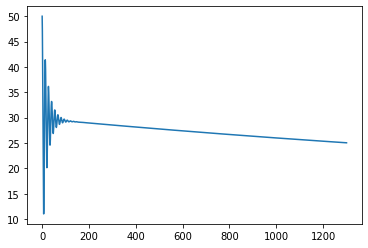

In [ ]:
plt.plot(t, v_maxcl)

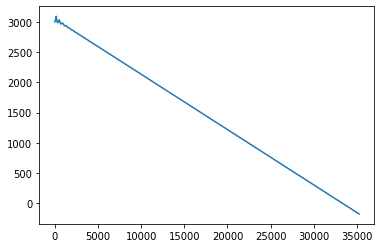

In [ ]:
plt.plot(x_maxcl,h_maxcl)

#All plots

In [ ]:
h_maxr.size

6000

In [ ]:
def f(arr):
  c = 0
  for i in arr:
    if i>0:
      c = c+1

  print(arr[c-1], arr[c+1], arr[c])
  return c

In [ ]:
cr = f(h_maxr)

0.5495754603737453 -0.5866663052483503 -0.018554001666387876


In [ ]:
ce = f(h_maxe)

0.42854788139031896 -0.5732185530845246 -0.07234203303299802


In [ ]:
ccl = f(h_maxcl)

0.22323933197309742 -0.7749414052156283 -0.2758576892640505


In [ ]:
def h0(h,r, c):
  a = h.copy()
  b = r.copy()
  b = b[:c]
  a = a[:c]
  return a, b

In [ ]:
hmr, xmr = h0(h_maxr, x_maxr, cr)

In [ ]:
hmr.size, xmr.size

(4948, 4948)

In [ ]:
hmcl, xmcl = h0(h_maxcl, x_maxcl, ccl)

In [ ]:
hme, xme = h0(h_maxe, x_maxe, ce)

In [ ]:
hme[-1]

0.42854788139031896

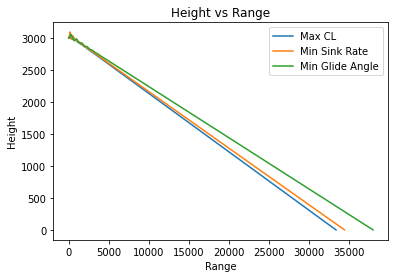

In [ ]:
# plt.figure(figsize = (10,7))
plt.title("Height vs Range")
plt.xlabel("Range")
plt.ylabel("Height")
plt.plot(xmcl,hmcl)
plt.plot(xme,hme)
plt.plot(xmr, hmr)
# plt.text(xmcl[-1],0, format(xmcl[-1],".2f"), )
# plt.text(xme[-1],0, format(xme[-1],".2f"), wrap = 1)
# plt.text(xmr[-1],0, format(xmr[-1],".2f"))

plt.legend(['Max CL', 'Min Sink Rate', 'Min Glide Angle'])

In [ ]:
xmcl[-1], xme[-1], xmr[-1]

(33339.97647543584, 34405.32205040255, 37956.99524010785)

In [ ]:
tr = cr*1300/6000
te = ce*1300/6000
tcl = ccl*1300/6000

In [ ]:
tr, te, tcl

(1072.0666666666666, 1220.05, 1224.6)

In [ ]:
te = np.round(te)
tcl = np.round(tcl)
tr = np.round(tr)

In [ ]:
ite = te*6000/1300
itcl = tcl*6000/1300
itr = tr*6000/1300

In [ ]:
ite = np.round(ite)
itcl = np.round(itcl)
itr = np.round(itr)

In [ ]:
itcl

5654.0

In [ ]:
def v0(v, t, c):
  vn = v.copy()
  vn = vn[:c]
  tn = t.copy()
  tn = tn[:c]
  return vn, tn

In [ ]:
vcl, tcl = v0(v_maxcl, t, int(itcl))
vr, tr = v0(v_maxr, t, int(itr))
ve, te = v0(v_maxe, t, int(ite))

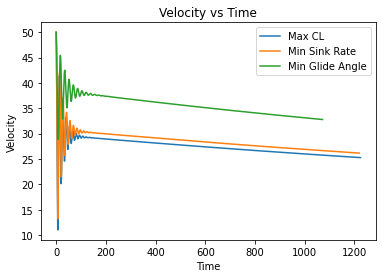

In [ ]:
plt.title("Velocity vs Time")
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.plot(tcl, vcl)
plt.plot(te, ve)
plt.plot(tr, vr)
plt.legend(['Max CL', 'Min Sink Rate', 'Min Glide Angle'])

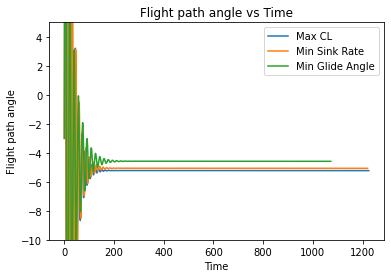

In [ ]:
plt.title("Flight path angle vs Time")
plt.xlabel("Time")
plt.ylabel("Flight path angle")
plt.ylim(-10, 5)
plt.plot(tcl, gamma_deg_maxcl[:int(itcl)])
plt.plot(te, gamma_deg_maxe[:int(ite)])
plt.plot(tr, gamma_deg[:int(itr)])
plt.legend(['Max CL', 'Min Sink Rate', 'Min Glide Angle'])

In [ ]:
tcl[-1], tr[-1], te[-1]

(1225.0208368061344, 1072.028671445241, 1220.0366727787964)

In [ ]:
#check of flight path angle
print(gamma_deg_maxcl[int(itcl)])
print(gamma_deg_maxe[int(ite)])
gamma_deg[int(itr)]

-5.228056082076355
-5.067805345498608


-4.586258820064909

In [ ]:
e1 = 1.5/coeff_drag(1.5) #maxcl
print(rad2deg(math.atan(-1/e1)))

e3 = math.sqrt(3)*Cl_star/coeff_drag(math.sqrt(3)*Cl_star) #min sink
print(rad2deg(math.atan(-1/e3)))

e2 = Cl_star/coeff_drag(Cl_star) #min glide
print(rad2deg(math.atan(-1/e2)))

-5.246285174950179
-5.32304275079167
-4.613204577163879


In [ ]:
#max range using analytic
Rmax_cl = e1*H
print(Rmax_cl)
Rmax_end = e3*H
print(Rmax_end)
Rmax = e2*H
print(Rmax)

32672.012341581612
32198.22317589329
37179.30563605928


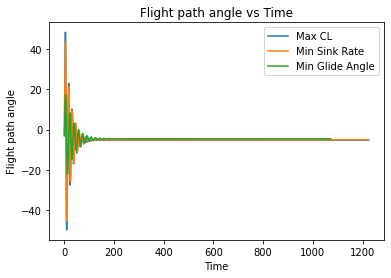

In [ ]:
plt.title("Flight path angle vs Time")
plt.xlabel("Time")
plt.ylabel("Flight path angle")
# plt.ylim(-10, 5)
plt.plot(tcl, gamma_deg_maxcl[:int(itcl)])
plt.plot(te, gamma_deg_maxe[:int(ite)])
plt.plot(tr, gamma_deg[:int(itr)])
plt.legend(['Max CL', 'Min Sink Rate', 'Min Glide Angle'])

In [ ]:
def CL32(cl):
  return cl**(1.5)/coeff_drag(cl)

In [ ]:
#max range
print(CL32(Cl_star))

11.706748221295033


In [ ]:
#max end
print(CL32(math.sqrt(3)*Cl_star))

13.342807592217408


In [ ]:
#max cl
print(CL32(1.5))

13.338293184464927


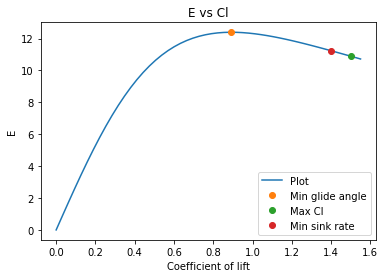

In [ ]:
plt.plot(cl, E(cl))
plt.title("E vs Cl")
plt.xlabel("Coefficient of lift")
plt.ylabel("E")
plt.plot(Cl_star, E(Cl_star),'o' )
plt.plot(1.5, E(1.5), 'o')
plt.plot(1.4, E(1.4), 'o')
plt.legend(["Plot", "Min glide angle", "Max Cl", "Min sink rate"])

In [ ]:
def Cl32(Cl):
  return Cl**1.5 / coeff_drag(Cl)

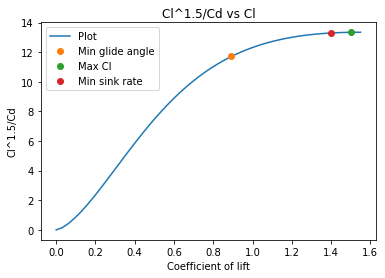

In [ ]:
plt.plot(cl, Cl32(cl))
plt.title("Cl^1.5/Cd vs Cl")
plt.xlabel("Coefficient of lift")
plt.ylabel("Cl^1.5/Cd")
plt.plot(Cl_star, Cl32(Cl_star),'o' )
plt.plot(1.5, Cl32(1.5), 'o')
plt.plot(1.4, Cl32(1.4), 'o')
plt.legend(["Plot", "Min glide angle", "Max Cl", "Min sink rate"])

In [ ]:
H

3000

In [ ]:
H*E(Cl_star)

37179.30563605928

In [ ]:
cl32 = Cl32(1.5)

In [ ]:
np.sqrt(1.225*S/(2*m*9.8)) * cl32 * 2 * 9296 * (1 - np.exp(-H/(2*9296)))

1191.231999177739

750